In [1]:
from model.module.autoencoder import *
import matplotlib.pyplot as plt

In [2]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
reset_graph()

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

train_x = mnist.train.images # image만 필요. label(y)은 필요없다.
train_x = train_x.astype(np.float32).reshape(-1,28*28)  # (이미지 데이터 수, 28*28)
train_y = mnist.train.labels

valid_x, train_x = train_x[:5000], train_x[5000:]
valid_y, train_y = train_y[:5000], train_y[5000:]

W0905 11:24:17.807269  9508 deprecation.py:323] From <ipython-input-3-7e18a8f26072>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0905 11:24:17.810291  9508 deprecation.py:323] From C:\Users\user\Anaconda3\envs\kaggle\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0905 11:24:17.811234  9508 deprecation.py:323] From C:\Users\user\Anaconda3\envs\kaggle\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0905 11:24:18.079660  9508 deprecation.py:323] From C:\Users\user\Anaconda3\envs\kaggle\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0905 11:24:18.079660  9508 deprecation.py:323] From C:\Users\user\Anaconda3\envs\kaggle\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0905 11:24:18.122628  9508 deprecation.py:323] From C:\Users\user\Anaconda3\envs\kaggle\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
valid_x = valid_x.reshape(5000,28,28)

In [5]:
encoding, outputs = autoencoder(valid_x, n_hidden1=20, n_hidden2=15, n_hidden3=10, n_epochs=30, learning_rate=0.05, batch_size=100)

W0905 11:24:18.542483  9508 deprecation_wrapper.py:119] From C:\Users\user\workspace\Mullin\model\module\autoencoder.py:203: The name tf.keras.initializers.he_normal is deprecated. Please use tf.compat.v1.keras.initializers.he_normal instead.

W0905 11:24:18.542483  9508 deprecation_wrapper.py:119] From C:\Users\user\workspace\Mullin\model\module\autoencoder.py:212: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 11:24:18.547324  9508 deprecation.py:323] From C:\Users\user\workspace\Mullin\model\module\autoencoder.py:214: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0905 11:24:18.951705  9508 deprecation_wrapper.py:119] From C:\Users\user\workspace\Mullin\model\module\autoencoder.py:225: The name tf.get_collection is deprecated. Please use tf.compat.v1.get_collection instead.

W0905 11:24:18.951705  9508 deprecation_wrapper.py:119] 

:::::::: Autoencoding training start
epoch: 1/30, Train MSE: 0.0428204872
epoch: 2/30, Train MSE: 0.0390437767
epoch: 3/30, Train MSE: 0.0381318852
epoch: 4/30, Train MSE: 0.0372180194
epoch: 5/30, Train MSE: 0.0383371525
epoch: 6/30, Train MSE: 0.0353843346
epoch: 7/30, Train MSE: 0.0343111195
epoch: 8/30, Train MSE: 0.0284900274
epoch: 9/30, Train MSE: 0.0288657434
epoch: 10/30, Train MSE: 0.0300436784
epoch: 11/30, Train MSE: 0.0293279476
epoch: 12/30, Train MSE: 0.0275269151
epoch: 13/30, Train MSE: 0.0283038821
epoch: 14/30, Train MSE: 0.0258939974
epoch: 15/30, Train MSE: 0.0264953934
epoch: 16/30, Train MSE: 0.0241013002
epoch: 17/30, Train MSE: 0.0261919294
epoch: 18/30, Train MSE: 0.0301249232
epoch: 19/30, Train MSE: 0.0276663397
epoch: 20/30, Train MSE: 0.0241191015
epoch: 21/30, Train MSE: 0.0264232159
epoch: 22/30, Train MSE: 0.0276898723
epoch: 23/30, Train MSE: 0.0265447069
epoch: 24/30, Train MSE: 0.0262004342
epoch: 25/30, Train MSE: 0.0251891091
epoch: 26/30, Train MS

In [6]:
encoding.shape

(5000, 28, 10)

In [11]:
a = pd.DataFrame(encoding[0])
a
# encoding 데이터의 모습
# 양쪽에서 가운데로 밀어넣은 형태

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.370800,0.206902,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.370800,0.206902,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.370800,0.206902,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.370800,0.206902,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.370800,0.206902,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.370800,0.206902,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.370800,0.206902,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.981735,0.824515,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,4.068880,3.288655,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,4.207460,3.625325,0.0,0.0,0.0


8
5


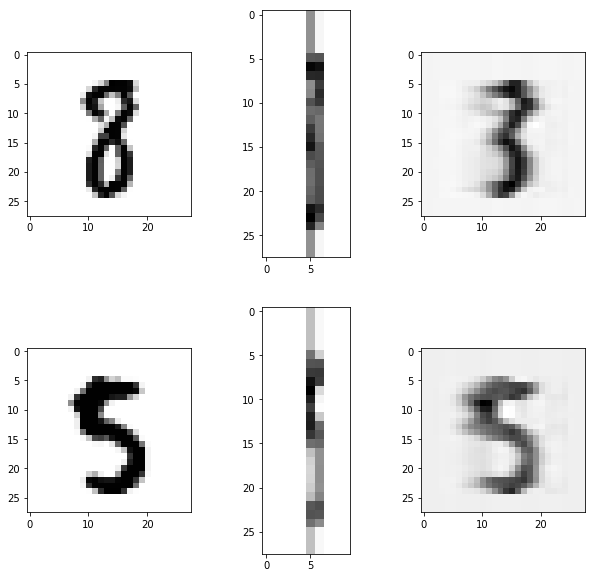

In [7]:
idx = 50
print(np.argmax(valid_y[idx]))
print(np.argmax(valid_y[idx+10]))

fig, axes = plt.subplots(nrows=2, ncols=3)

fig.set_size_inches(10,10)

axes[0][0].imshow(valid_x[idx], cmap="Greys", interpolation="nearest")
axes[0][1].imshow(encoding[idx], cmap="Greys", interpolation="nearest")
axes[0][2].imshow(outputs[idx], cmap="Greys", interpolation="nearest")

axes[1][0].imshow(valid_x[idx+10], cmap="Greys", interpolation="nearest")
axes[1][1].imshow(encoding[idx+10], cmap="Greys", interpolation="nearest")
axes[1][2].imshow(outputs[idx+10], cmap="Greys", interpolation="nearest")

In [25]:
a = np.random.rand(100,28,28)

In [46]:
en, ou = autoencoder(a, n_hidden1=500, n_hidden2=200, n_hidden3=100, n_epochs=30, learning_rate=0.05, batch_size=20)

:::::::: Autoencoding training start
epoch: 1/30, Train MSE: 0.1800525934
epoch: 2/30, Train MSE: 0.1101408079
epoch: 3/30, Train MSE: 0.0943561494
epoch: 4/30, Train MSE: 0.9419033527
epoch: 5/30, Train MSE: 0.2522369027
epoch: 6/30, Train MSE: 0.3211945593
epoch: 7/30, Train MSE: 0.1335925162
epoch: 8/30, Train MSE: 0.1256006211
epoch: 9/30, Train MSE: 0.1219979823
epoch: 10/30, Train MSE: 0.0886577889
epoch: 11/30, Train MSE: 0.0869077444
epoch: 12/30, Train MSE: 0.0926806554
epoch: 13/30, Train MSE: 0.0882685781
epoch: 14/30, Train MSE: 0.0863771215
epoch: 15/30, Train MSE: 0.0854779035
epoch: 16/30, Train MSE: 0.0864124671
epoch: 17/30, Train MSE: 0.0844167024
epoch: 18/30, Train MSE: 0.0836242661
epoch: 19/30, Train MSE: 0.0832318142
epoch: 20/30, Train MSE: 0.0838011280
epoch: 21/30, Train MSE: 0.0849441960
epoch: 22/30, Train MSE: 0.0837597474
epoch: 23/30, Train MSE: 0.0842413604
epoch: 24/30, Train MSE: 0.0840004012
epoch: 25/30, Train MSE: 0.0844844133
epoch: 26/30, Train MS

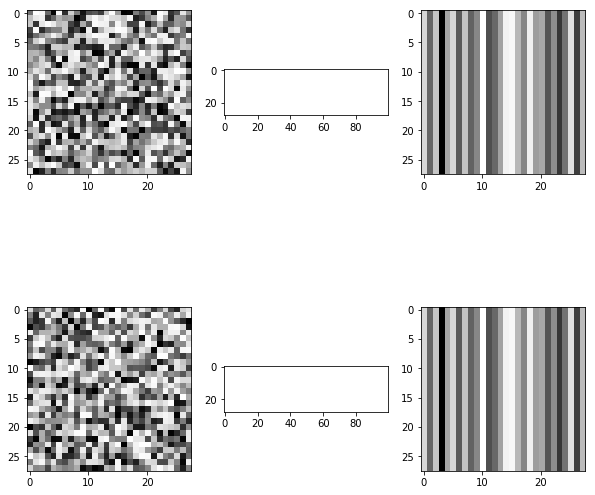

In [47]:
idx = 10

fig, axes = plt.subplots(nrows=2, ncols=3)

fig.set_size_inches(10,10)

axes[0][0].imshow(a[idx], cmap="Greys", interpolation="nearest")
axes[0][1].imshow(en[idx], cmap="Greys", interpolation="nearest")
axes[0][2].imshow(ou[idx], cmap="Greys", interpolation="nearest")

axes[1][0].imshow(a[idx+10], cmap="Greys", interpolation="nearest")
axes[1][1].imshow(en[idx+10], cmap="Greys", interpolation="nearest")
axes[1][2].imshow(ou[idx+10], cmap="Greys", interpolation="nearest")